---
---
### Distribución Binomial Negativa: Dos Formulaciones

La **distribución binomial negativa** modela la cantidad de ensayos necesarios hasta obtener un número fijo de éxitos \( r \), en una secuencia de ensayos de Bernoulli independientes con probabilidad de éxito \( p \).

### 🔹 Opción 1: Total de ensayos hasta el r-ésimo éxito

Esta forma modela la **cantidad total de ensayos** necesarios para obtener exactamente \( r \) éxitos.

$$
P(X = x) = \binom{x - 1}{r - 1} \cdot p^r \cdot (1 - p)^{x - r}
$$

- $ X $: número total de ensayos hasta obtener el $ r $-ésimo éxito.
- Soporte: $ x = r, r+1, r+2, \dots $

---

### 🔹 Opción 2: Número de fracasos antes del r-ésimo éxito

Esta formulación modela la **cantidad de fracasos** observados antes de obtener el \( r \)-ésimo éxito.

$$
P(X = k) = \binom{k + r - 1}{r - 1} \cdot p^r \cdot (1 - p)^k
$$

- $ X $: número de fracasos antes de obtener el $ r $-ésimo éxito.
- Soporte: $ k = 0, 1, 2, \dots $

---

### ✅ Comparación

| Parámetro | Variable que mide | Fórmula |
|-----------|-------------------|---------|
| $$ x $$   | Ensayos totales hasta el $$ r-ésimo\ éxito $$ | $$ \binom{x-1}{r-1} \cdot p^r \cdot (1-p)^{x-r} $$ |
| $$ k $$   | Fracasos antes del $$ r-ésimo\ éxito $$ | $$ \binom{k + r - 1}{r - 1} \cdot p^r \cdot (1 - p)^k $$ |

Ambas fórmulas son equivalentes en términos del fenómeno que modelan, pero varía qué aspecto se mide (ensayos totales o solo fracasos).



---

## 📐 Definición Formal

Sea \( X \) el número de **fracasos** antes de obtener \( r \) éxitos.

La función de probabilidad es:

$$
P(X = k) = \binom{k + r - 1}{r - 1} \cdot p^r \cdot (1 - p)^k
$$

donde:

- \( k \in \{0, 1, 2, \dots\} \)
- \( r \) es el número de éxitos requeridos.
- \( p \) es la probabilidad de éxito en un ensayo.

---

## 🧮 Propiedades

| Propiedad             | Fórmula                                       |
|-----------------------|-----------------------------------------------|
| Esperanza (media)     | $$ E[X] = \frac{r(1 - p)}{p} $$                |
| Varianza              | $$ \text{Var}(X) = \frac{r(1 - p)}{p^2} $$     |
| Soporte               | $$ X \in \{0, 1, 2, \dots\} $$                |

---

## 🎲 Diferencia con la Binomial

| Concepto                        | Binomial                           | Binomial Negativa                 |
|----------------------------------|------------------------------------|-----------------------------------|
| ¿Qué se cuenta?                 | Número de éxitos                   | Número de fracasos                |
| ¿Cuándo termina?                | Después de un número fijo de ensayos | Cuando se alcanzan \( r \) éxitos |
| ¿Ensayos con reemplazo?        | Sí                                 | Sí                                |

---

## 🧠 Intuición

> La binomial negativa responde a la pregunta:  
> **¿Cuántos fracasos tengo antes de lograr \( r \) éxitos, si cada intento tiene probabilidad \( p \)?**

---

## 📌 Usos típicos

- Evaluar cuántos errores comete un operador antes de completar una cierta cantidad de tareas correctamente.
- Contar cuántas veces falla un sistema antes de que funcione correctamente varias veces.
- Modelar situaciones de conteo hasta el éxito repetido (como en telecomunicaciones, biología, etc.).

---
---

In [21]:
def distribucion_binomial_negativa_ensayos_exitos(p, k, n):
    """
    Calcula la probabilidad de que el k-ésimo éxito ocurra en el n-ésimo ensayo
    bajo una distribución binomial negativa.
    
    Parámetros:
    p (float): Probabilidad de éxito en un solo ensayo.
    k (int): Número de éxitos deseados.
    n (int): Número total de ensayos.
    
    Retorna:
    float: Probabilidad de obtener k éxitos en n ensayos.
    """
    from math import comb
    
    if not (0 < p < 1):
        raise ValueError("La probabilidad p debe estar entre 0 y 1 (excluyendo 0 y 1).")
    if k < 1 or n < k:
        raise ValueError("Debe cumplirse 1 ≤ k ≤ n.")
    
    return comb(n - 1, k - 1) * (p ** k) * ((1 - p) ** (n - k))


# Ejemplo de uso
p = 0.5  # Probabilidad de éxito
k = 3    # Número de éxitos deseados
n = 10   # Número total de ensayos
    
probabilidad = distribucion_binomial_negativa_ensayos_exitos(p, k, n)
print(f"La probabilidad de obtener {k} éxitos en {n} ensayos es: {probabilidad:.4f}")

La probabilidad de obtener 3 éxitos en 10 ensayos es: 0.0352


In [22]:
def test_distribucion_binomial_negativa_ensayos_exitos():
    def check(expected, actual, tol=1e-4):
        assert abs(expected - actual) < tol, f"Esperado: {expected}, Obtenido: {actual}"
    
    check(0.03515625, distribucion_binomial_negativa_ensayos_exitos(0.5, 3, 10))
    check(0.08192, distribucion_binomial_negativa_ensayos_exitos(0.2, 2, 5))
    check(0.063, distribucion_binomial_negativa_ensayos_exitos(0.7, 1, 3))

    print("Todas las pruebas pasaron exitosamente.")

test_distribucion_binomial_negativa_ensayos_exitos()

Todas las pruebas pasaron exitosamente.


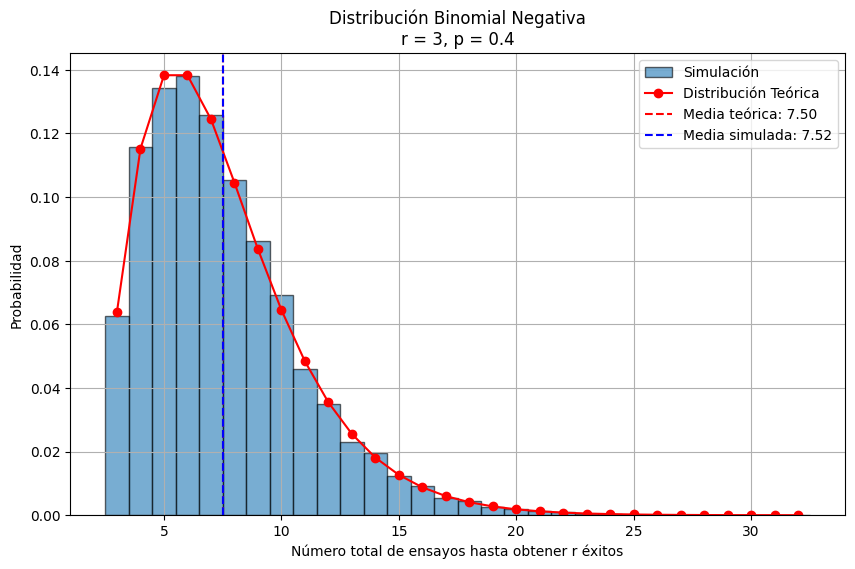

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import nbinom

# Parámetros de la distribución
r = 3          # número de éxitos deseados
p = 0.4        # probabilidad de éxito en un ensayo
size = 10000   # cantidad de simulaciones

# --- Simulación ---
# La binomial negativa en scipy define X como el número de fracasos hasta alcanzar r éxitos
# Por lo tanto, la cantidad total de ensayos será X + r
simulaciones = nbinom.rvs(r, p, size=size)
ensayos_simulados = simulaciones + r

# --- Distribución teórica ---
k_vals = np.arange(r, r + 30)
prob_teorica = nbinom.pmf(k_vals - r, r, p)

# --- Medidas ---
media_teorica = r / p
media_simulada = np.mean(ensayos_simulados)

# --- Gráfico ---
plt.figure(figsize=(10,6))
plt.hist(ensayos_simulados, bins=np.arange(r - 0.5, r + 30), 
         density=True, alpha=0.6, edgecolor='black', label='Simulación')

plt.plot(k_vals, prob_teorica, 'o-', color='red', label='Distribución Teórica')

# Medias
plt.axvline(media_teorica, color='red', linestyle='--', label=f'Media teórica: {media_teorica:.2f}')
plt.axvline(media_simulada, color='blue', linestyle='--', label=f'Media simulada: {media_simulada:.2f}')

plt.title(f'Distribución Binomial Negativa\nr = {r}, p = {p}')
plt.xlabel('Número total de ensayos hasta obtener r éxitos')
plt.ylabel('Probabilidad')
plt.legend()
plt.grid(True)
plt.show()

In [25]:
def distribucion_binomial_negativa_fracasos_anteriores(p, k, n):
    """
    Calcula la probabilidad de que el k-ésimo éxito ocurra después de n fracasos
    bajo una distribución binomial negativa.
    
    Parámetros:
    p (float): Probabilidad de éxito en un solo ensayo.
    k (int): Número de éxitos deseados.
    n (int): Número total de fracasos.
    
    Retorna:
    float: Probabilidad de obtener k éxitos después de n fracasos.
    """
    from math import comb
    
    if not (0 < p < 1):
        raise ValueError("La probabilidad p debe estar entre 0 y 1 (excluyendo 0 y 1).")
    if k < 1 or n < 0:
        raise ValueError("Debe cumplirse k ≥ 1 y n ≥ 0.")
    
    return comb(n + k - 1, k - 1) * (p ** k) * ((1 - p) ** n)

# Ejemplo de uso
p = 0.5  # Probabilidad de éxito
k = 3    # Número de éxitos deseados
n = 10   # Número total de fracasos
probabilidad = distribucion_binomial_negativa_fracasos_anteriores(p, k, n)
print(f"La probabilidad de obtener {k} éxitos después de {n} fracasos es: {probabilidad:.4f}")


La probabilidad de obtener 3 éxitos después de 10 fracasos es: 0.0081


In [26]:
def test_distribucion_binomial_negativa_fracasos_anteriores():
    def check(expected, actual, tol=1e-4):
        assert abs(expected - actual) < tol, f"Esperado: {expected}, Obtenido: {actual}"
    
    check(0.0081, distribucion_binomial_negativa_fracasos_anteriores(0.5, 3, 10))
    check(0.0786, distribucion_binomial_negativa_fracasos_anteriores(0.2, 2, 5))
    check(0.0189, distribucion_binomial_negativa_fracasos_anteriores(0.7, 1, 3))

    print("Todas las pruebas pasaron exitosamente.")
test_distribucion_binomial_negativa_fracasos_anteriores()


Todas las pruebas pasaron exitosamente.


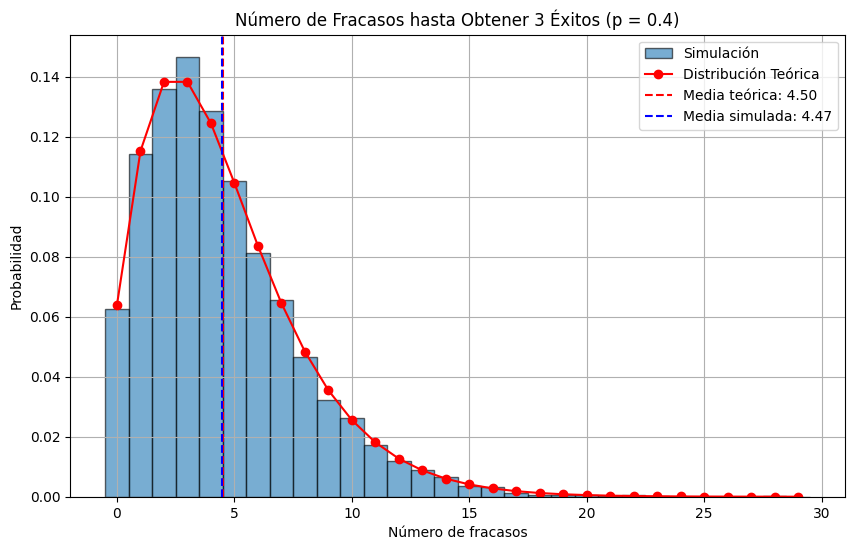

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import nbinom

# Parámetros
r = 3          # Número de éxitos deseados
p = 0.4        # Probabilidad de éxito en un ensayo
size = 10000   # Número de simulaciones

# --- Simulación ---
# scipy.stats.nbinom modela directamente el número de fracasos antes de r éxitos
fracasos_simulados = nbinom.rvs(r, p, size=size)

# --- Distribución teórica ---
k_vals = np.arange(0, 30)  # número de fracasos posibles
prob_teorica = nbinom.pmf(k_vals, r, p)

# --- Medidas ---
media_teorica = r * (1 - p) / p
media_simulada = np.mean(fracasos_simulados)

# --- Gráfico ---
plt.figure(figsize=(10,6))
plt.hist(fracasos_simulados, bins=np.arange(-0.5, 30), 
         density=True, alpha=0.6, edgecolor='black', label='Simulación')

plt.plot(k_vals, prob_teorica, 'o-', color='red', label='Distribución Teórica')

# Medias
plt.axvline(media_teorica, color='red', linestyle='--', label=f'Media teórica: {media_teorica:.2f}')
plt.axvline(media_simulada, color='blue', linestyle='--', label=f'Media simulada: {media_simulada:.2f}')

plt.title(f'Número de Fracasos hasta Obtener {r} Éxitos (p = {p})')
plt.xlabel('Número de fracasos')
plt.ylabel('Probabilidad')
plt.legend()
plt.grid(True)
plt.show()

